# 다층 퍼셉트론(MultiLayer Perceptron, MLP)

## Keras - texts_to_matrix()

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [5]:
print('Count Mode:\n', t.texts_to_matrix(texts, mode = 'count'))
print('\nBinary Mode:\n', t.texts_to_matrix(texts, mode = 'binary'))
print('\nTfidf Mode:\n', t.texts_to_matrix(texts, mode = 'tfidf'))
print('\nFreq Mode:\n', t.texts_to_matrix(texts, mode = 'freq'))

Count Mode:
 [[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

Binary Mode:
 [[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

Tfidf Mode:
 [[0.         0.         0.84729786 0.84729786 1.09861229 0.
  0.         0.         0.         0.        ]
 [0.         0.84729786 0.84729786 0.84729786 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.43459998 0.         0.         0.         1.09861229
  1.09861229 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.09861229 1.09861229 1.09861229]]

Freq Mode:
 [[0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.5        0.  

In [ ]:
'''
    count: 문서 단어 행렬(DTM) 생성. 
            DTM은 BoW을 기반으로 하므로 단어 순서 정보는 보존되지 않음.
            word_index의 인덱스는 1부터 시작, 결과 행렬의 인덱스는 0부터 시작. 따라서 인덱스 0은 모두 0의 값을 가짐.
    binary: 단어의 존재 유무로만 행렬을 표현. 존재하면 1, 존재하지 않으면 0.
    tfidf: TF-IDF 행렬 생성. (TF-Term Frequency; IDF-Inverse Document Frequency)
    freq: 각 문서에서의 각 단어의 등장 빈도
'''

## 1. 20개 뉴스 그룹(Twenty Newgroups) 데이터 확인

In [10]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [13]:
newsdata = fetch_20newsgroups(subset='train') # 훈련 데이터만 불러오기; all, train, test
newsdata.keys() # 데이터의 속성

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [16]:
print('train data length: ', len(newsdata.target))

train data length:  11314


In [17]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


<b>목적: 테스트 데이터의 이메일 본문을 보고, 20개의 주제 중 어느 주제인지 맞추기</b>

In [21]:
print('첫번째 샘플의 레이블: {}, {}번 레이블이 의미하는 주제: {}'.format(newsdata.target[0], 
                                                     newsdata.target[0], newsdata.target_names[newsdata.target[0]]))

첫번째 샘플의 레이블: 7, 7번 레이블이 의미하는 주제: rec.autos


In [23]:
# 첫번째 샘플 출력
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [24]:
# 데이터 프레임 생성
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [26]:
# null 확인
data.isnull().sum()

email     0
target    0
dtype: int64

In [27]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


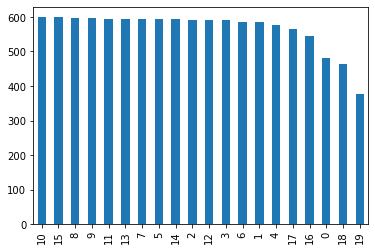

In [28]:
# label 값 분포 시각화
data['target'].value_counts().plot(kind='bar');

In [29]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [30]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [34]:
# 전처리
max_words = 10000 # 단어 최대 개수
num_classes = 20 # label 수

def prepare_data(train_data, test_data, mode): # mode: binary, count, tfidf, freq
    t = Tokenizer(num_words = max_words)
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode)
    X_test = t.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, t.index_word

X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [35]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


## 2. 다층 퍼셉트론을 사용해 텍스트 분류하기

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(max_words,)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    
    return score[1]

modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 13ms/step - loss: 2.7089 - accuracy: 0.1843 - val_loss: 0.9674 - val_accuracy: 0.8216
Epoch 2/5
80/80 [==============================] - 1s 11ms/step - loss: 1.0107 - accuracy: 0.7240 - val_loss: 0.4502 - val_accuracy: 0.8843
Epoch 3/5
80/80 [==============================] - 1s 11ms/step - loss: 0.4489 - accuracy: 0.8823 - val_loss: 0.3425 - val_accuracy: 0.9046
Epoch 4/5
80/80 [==============================] - 1s 11ms/step - loss: 0.2663 - accuracy: 0.9310 - val_loss: 0.2999 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 1s 11ms/step - loss: 0.1766 - accuracy: 0.9585 - val_loss: 0.2963 - val_accuracy: 0.9099
binary 모드의 테스트 정확도: 0.8272703289985657
Epoch 1/5
80/80 [==============================] - 1s 13ms/step - loss: 3.1565 - accuracy: 0.1436 - val_loss: 1.5582 - val_accuracy: 0.7571
Epoch 2/5
80/80 [==============================] - 1s 11ms/step - loss: 1.5803 - accuracy: 0.5872 - val_loss: 0.7088 - va